In [1]:
import xarray as xr
import numpy as np
import intake_informaticslab
import intake
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# Intoduction MOGREPS-UK examples 

For more information on the MOGREPS UK datasets see the [README](https://github.com/informatics-lab/intake_informaticslab#weather_forecasts) and associated links.

For demonstration purposes, these notebooks work with a subset of the large and dynamic MOGREPS-UK dataset. This is because even a metadata only representation can be too large in memory for low memory environments like MyBinder.

The code below was run at (2021-01-21) to give a snapshot of the full dataset:

```python
mogreps_uk_ds = intake.cat.met_office.weather_forecasts.mogreps_uk(license_accepted=True).to_dask()
mogreps_uk_ds

total_points = 0
for var in mogreps_uk_ds.data_vars:
    num_points = np.product(mogreps_uk_ds[var].shape)
    total_points += num_points

print(f"Number of points = {total_points:,}")
print(f"Uncompressed data volume = {mogreps_uk_ds.nbytes / 10**12:.1f}TB")
```
```
>>> Number of points = 32,729,734,164,480
>>> Uncompressed data volume = 130.9TB
```    

## Two ways of opening the dataset:

### Open fields on all vertical levels in one dataset

In [2]:
# Remove `start_cycle` and `end_cycle` to get complete dataset

mogreps_uk_ds = intake.cat.met_office.weather_forecasts.mogreps_uk(start_cycle="20210101T0000Z",  end_cycle="20210101T1200Z", license_accepted=True).to_dask()
mogreps_uk_ds

,Array,Chunk
Bytes,20.02 GB,12.13 MB
Shape,"(13, 127, 3, 970, 1042)","(1, 1, 3, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,20.02 GB,12.13 MB
Shape,"(13, 127, 3, 970, 1042)","(1, 1, 3, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


### Or data with differnt vertical level coordinates as different datasets

#### On pressure levels

In [3]:
ds_pressure_level = intake.cat.met_office.weather_forecasts.mogreps_uk.pressure_level(start_cycle="20210101T0000Z",  end_cycle="20210101T1200Z", license_accepted=True).to_dask()
ds_pressure_level

,Array,Chunk
Bytes,60.07 GB,36.39 MB
Shape,"(13, 127, 3, 3, 970, 1042)","(1, 1, 3, 3, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray


#### On height levels

In [4]:
ds_height_level = intake.cat.met_office.weather_forecasts.mogreps_uk.height_level(start_cycle="20210101T0000Z",  end_cycle="20210101T1200Z", license_accepted=True).read_chunked()
ds_height_level

,Array,Chunk
Bytes,660.82 GB,400.25 MB
Shape,"(13, 127, 3, 33, 970, 1042)","(1, 1, 3, 33, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray


#### On depth levels

In [5]:
depth_level_ds = intake.cat.met_office.weather_forecasts.mogreps_uk.depth_level(start_cycle="20210101T0000Z",  end_cycle="20210101T1200Z", license_accepted=True).read_chunked()
depth_level_ds

,Array,Chunk
Bytes,80.10 GB,48.52 MB
Shape,"(13, 127, 3, 4, 970, 1042)","(1, 1, 3, 4, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray


#### On a single level (surface)

In [6]:
single_level_ds = intake.cat.met_office.weather_forecasts.mogreps_uk.single_level(start_cycle="20210101T0000Z",  end_cycle="20210101T1200Z", license_accepted=True).read_chunked()
single_level_ds

,Array,Chunk
Bytes,20.02 GB,12.13 MB
Shape,"(13, 127, 3, 970, 1042)","(1, 1, 3, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,20.02 GB,12.13 MB
Shape,"(13, 127, 3, 970, 1042)","(1, 1, 3, 970, 1042)"
Count,1652 Tasks,1651 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Example plots

### Mean over all realizations and the whole grid of `wet_bulb_potential_temperature` for t+1

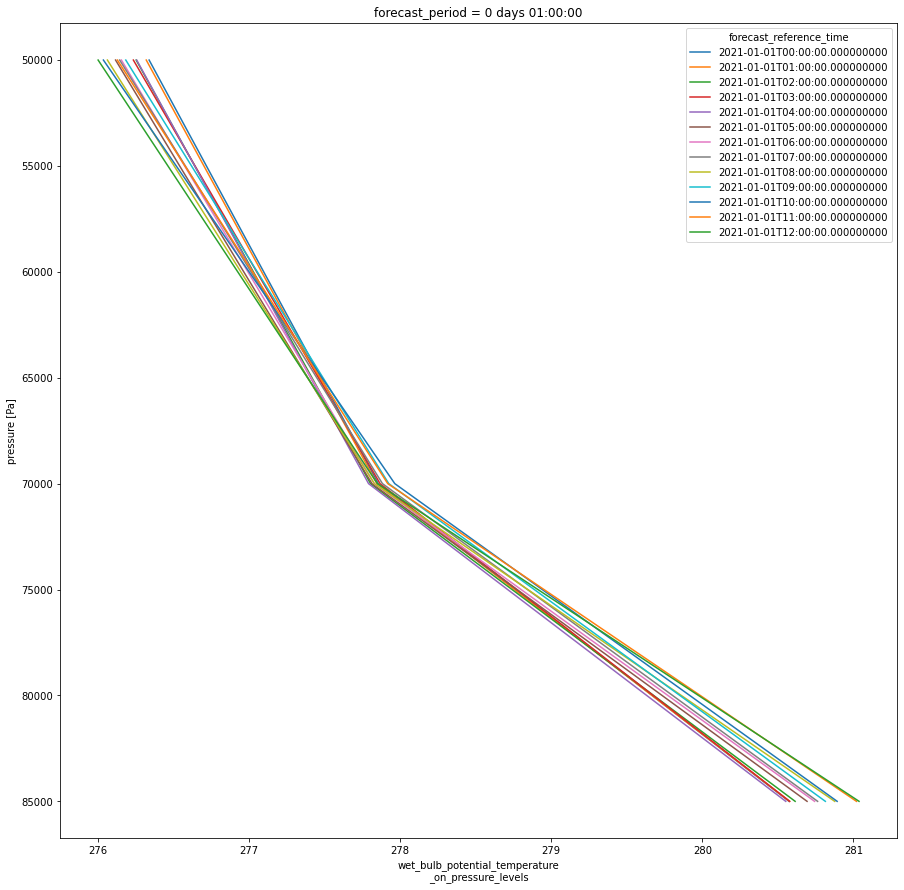

In [16]:
(ds_pressure_level
     .wet_bulb_potential_temperature_on_pressure_levels[:,1,:,:,:,:]
     .mean(
         dim=['projection_y_coordinate','projection_x_coordinate','realization'])
     .plot.line(y='pressure',  yincrease=False))

### Temperature at soil depth accros `y` for a given `x` min value from the realization and forecast range

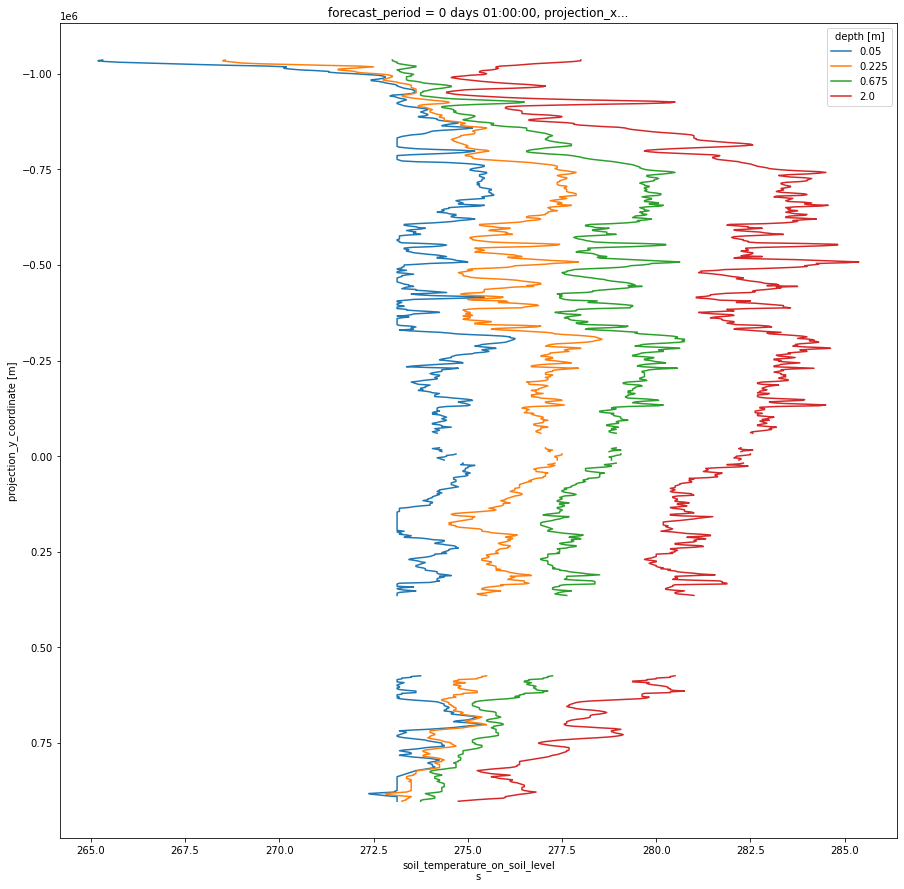

In [15]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # Gives warnings about NaN slices, this is to be expected as there is no soil temperature in the sea/lakes
    depth_level_ds.soil_temperature_on_soil_levels[:,1,:,:,:,950].min(dim=['realization','forecast_reference_time']).plot.line(y='projection_y_coordinate', yincrease=False)

### Show four randomly selected forcasts from the 'single level' catalogue

temperature_at_screen_level [2,100]


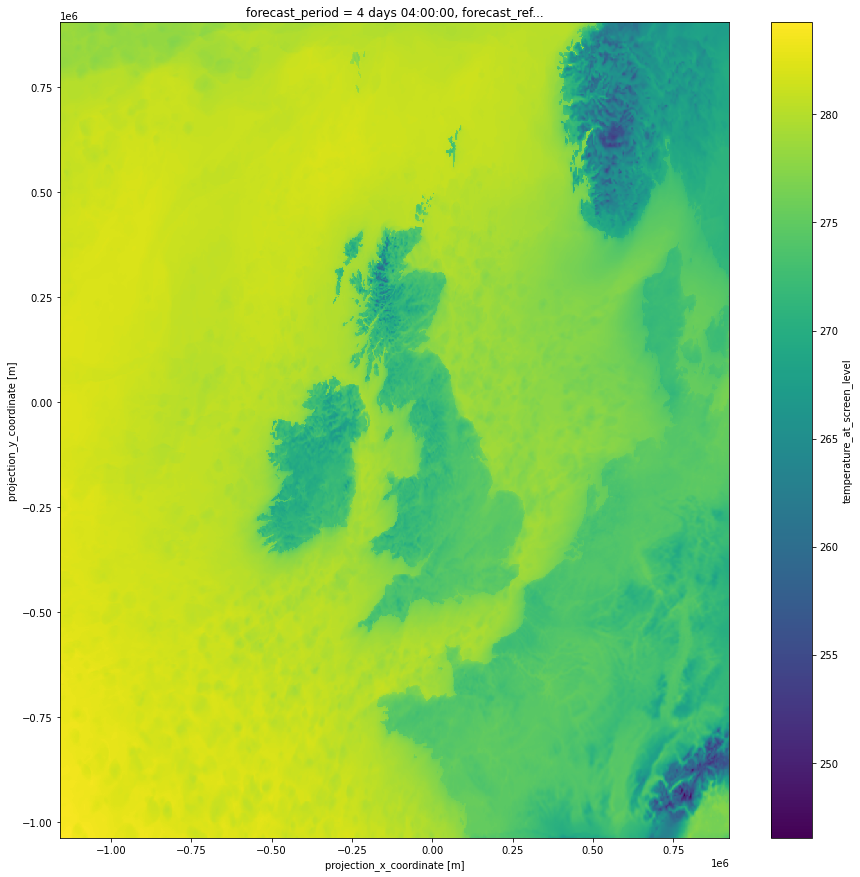

fog_fraction_at_screen_level [10,37]


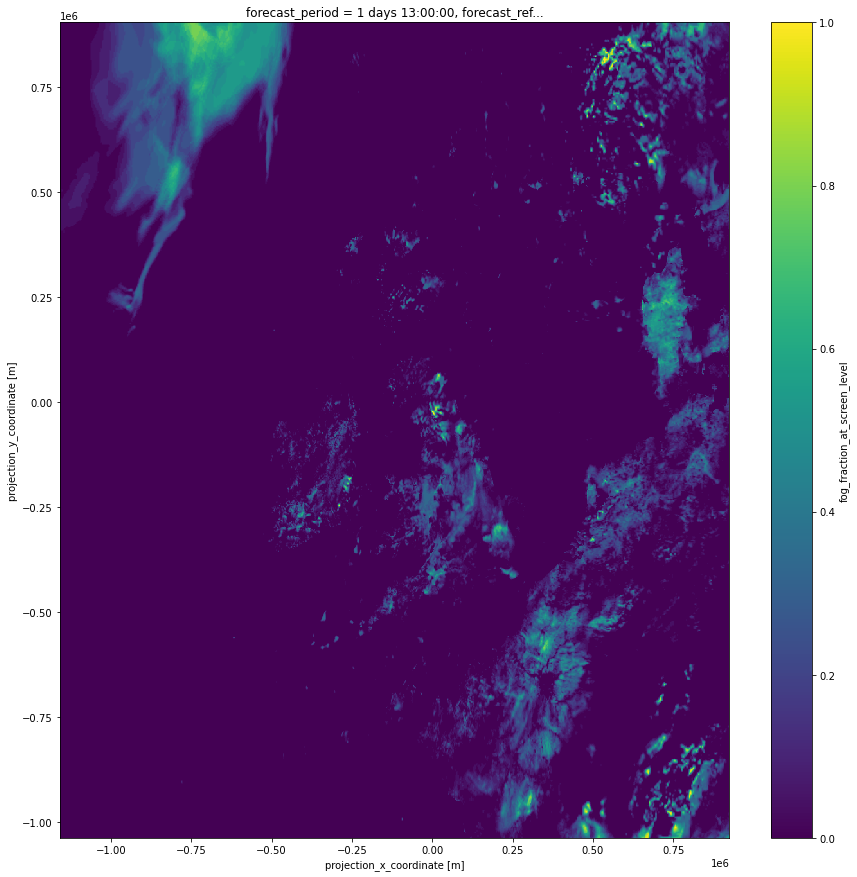

wind_speed_at_10m_max-PT01H [3,78]


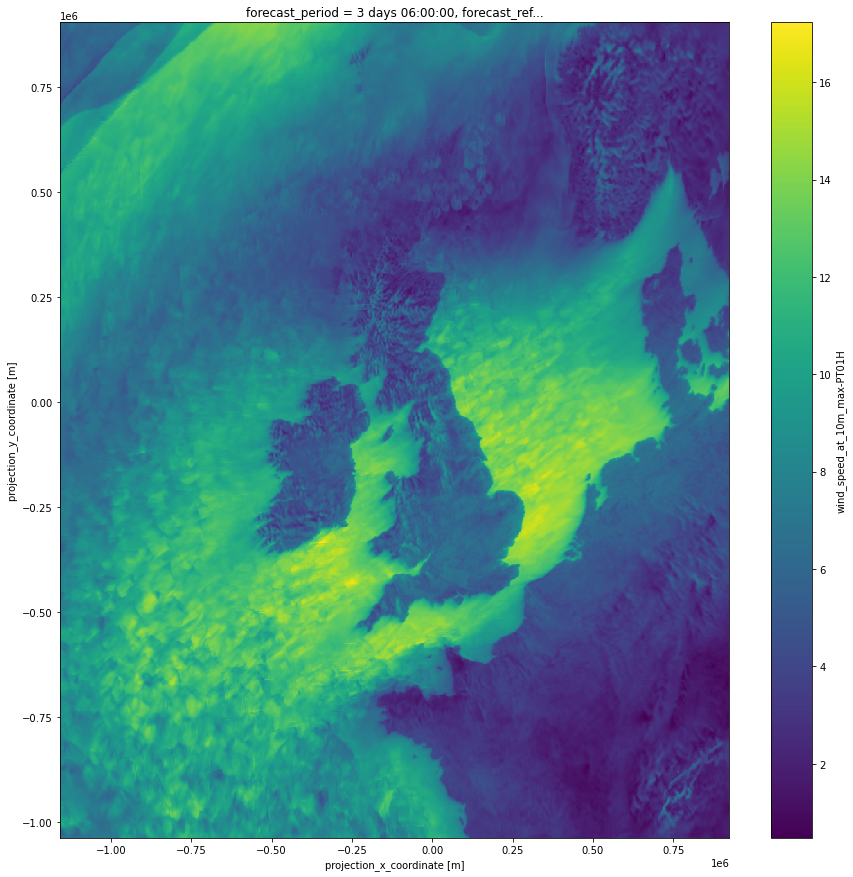

sensible_heat_flux_at_surface [3,108]


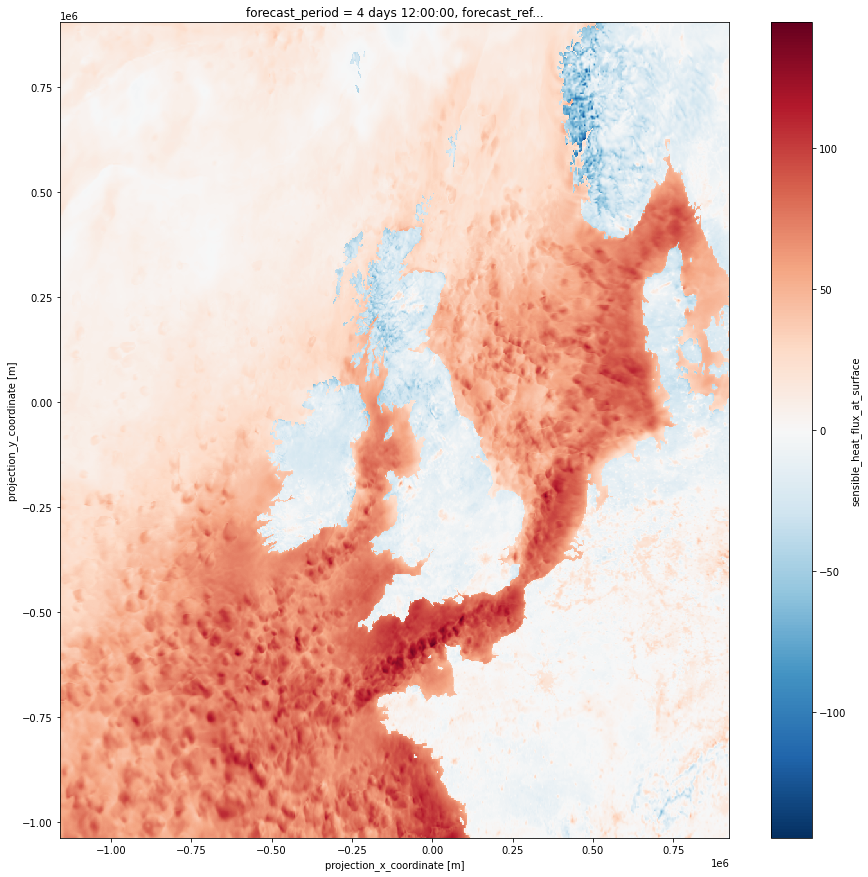

In [9]:
import random
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
for var in random.choices(list(single_level_ds.data_vars),k=4):
        i = random.randint(0, single_level_ds[var].shape[0] -1)
        j = random.randint(0, single_level_ds[var].shape[1] -1)
        print(var, f"[{i},{j}]")
        single_level_ds[var][i,j].mean(dim='realization').plot()
        plt.show()
